<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Run-Settings" data-toc-modified-id="Run-Settings-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Run Settings</a></span></li><li><span><a href="#Display-Configuration" data-toc-modified-id="Display-Configuration-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Display Configuration</a></span></li></ul></li><li><span><a href="#Load,-Filter,-&amp;-Prep-Sentiment-Analysis-Data" data-toc-modified-id="Load,-Filter,-&amp;-Prep-Sentiment-Analysis-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load, Filter, &amp; Prep Sentiment Analysis Data</a></span></li><li><span><a href="#Sentiment-Model-Correlations" data-toc-modified-id="Sentiment-Model-Correlations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sentiment Model Correlations</a></span></li><li><span><a href="#Aggregated-Market-Sentiment-Over-Time" data-toc-modified-id="Aggregated-Market-Sentiment-Over-Time-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aggregated Market Sentiment Over Time</a></span><ul class="toc-item"><li><span><a href="#Call-Duration-and-Word-Counts-Over-Time" data-toc-modified-id="Call-Duration-and-Word-Counts-Over-Time-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Call Duration and Word-Counts Over Time</a></span></li></ul></li><li><span><a href="#Sector-Exposures" data-toc-modified-id="Sector-Exposures-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sector Exposures</a></span></li><li><span><a href="#Style-Exposures" data-toc-modified-id="Style-Exposures-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Style Exposures</a></span></li><li><span><a href="#Returns-Analysis" data-toc-modified-id="Returns-Analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Returns Analysis</a></span><ul class="toc-item"><li><span><a href="#Top-Sentiment-vs-Bottom-Sentiment:-Quintile-Spreads" data-toc-modified-id="Top-Sentiment-vs-Bottom-Sentiment:-Quintile-Spreads-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Top Sentiment vs Bottom Sentiment: Quintile Spreads</a></span></li><li><span><a href="#Trailing-Returns-of-Sentiment-Score-Quintiles" data-toc-modified-id="Trailing-Returns-of-Sentiment-Score-Quintiles-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Trailing Returns of Sentiment Score Quintiles</a></span></li><li><span><a href="#Forward-Returns-of-Sentiment-Score-Quintiles" data-toc-modified-id="Forward-Returns-of-Sentiment-Score-Quintiles-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Forward Returns of Sentiment Score Quintiles</a></span></li></ul></li></ul></div>

# Quantitative Analysis of Sentiment Models

## Setup

### Imports

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown as md, Image, HTML
import matplotlib.pyplot as plt
import os

### Run Settings

In [2]:
# run from parent directory
os.chdir('../')

### Display Configuration

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn') 
plt.rcParams['figure.figsize'] = [18, 10]
plt.rcParams['figure.dpi']
display(HTML("<style>.container { width:60% !important; }</style>"))

## Load, Filter, & Prep Sentiment Analysis Data

In [4]:
# load raw call sentiment scores
call_sent = pd.read_csv('./output/r500_call_sent.csv')\
    .rename(columns={'finBert_sent':'FinBERT','sent_tb':'TextBlob','sent_cf':'Lougrhan & Mcdonald'})
call_sent_long = call_sent.melt(id_vars='cid')

# load scaled (z-scored) sentiment scores
call_sent_z = pd.read_csv('./output/r500_call_sent_z.csv')\
 .rename(columns={'finBert_sent':'FinBERT','sent_tb':'TextBlob','sent_cf':'Lougrhan & Mcdonald'})
call_sent_z_long = call_sent_z.melt(id_vars='cid')

# load meta-data for each call
call_meta = pd.read_csv('./output/r500_call_meta_sector.csv')
call_meta = call_meta.loc[(call_meta['call_date']>'2018-12-31') & 
                          (call_meta['call_date']<'2020-10-01'),]

call_data = call_meta.merge(call_sent,how='inner',on='cid')
call_data['yyyymm'] = call_data['call_date'].str[0:7]
#call_data['yyyyqq'] = 'Y' + call_data["call_date"].dt.year.astype(str) + \
#                      '-M' + call_data["call_date"].dt.month.astype(str)
# call_data = call_meta.merge(call_text,how='inner',on='cid')

## Sentiment Model Correlations

In [6]:
call_sent.corr()

,pos_tfidf,neg_tfidf,sent_tfidf,word_count,pos_cf,neg_cf,Lougrhan & Mcdonald,TextBlob,finBert_pos,finBert_neg,FinBERT,finBert_sent_mean
pos_tfidf,1.000000,-1.000000,1.000000,-0.077018,0.610708,-0.759370,0.819914,0.485457,0.086414,-0.153438,0.138051,0.154362
neg_tfidf,-1.000000,1.000000,-1.000000,0.077018,-0.610708,0.759370,-0.819914,-0.485457,-0.086414,0.153438,-0.138051,-0.154362
sent_tfidf,1.000000,-1.000000,1.000000,-0.077018,0.610708,-0.759370,0.819914,0.485457,0.086414,-0.153438,0.138051,0.154362
word_count,-0.077018,0.077018,-0.077018,1.000000,0.042254,0.155035,-0.056639,-0.021226,-0.059052,0.065202,-0.078256,-0.086369
pos_cf,0.610708,-0.610708,0.610708,0.042254,1.000000,-0.360884,0.860560,0.586809,0.101527,-0.072140,0.118337,0.126585
neg_cf,-0.759370,0.759370,-0.759370,0.155035,-0.360884,1.000000,-0.785586,-0.310495,-0.095393,0.196285,-0.163308,-0.187932
Lougrhan & Mcdonald,0.819914,-0.819914,0.819914,-0.056639,0.860560,-0.785586,1.000000,0.558904,0.119459,-0.155064,0.167704,0.186624
TextBlob,0.485457,-0.485457,0.485457,-0.021226,0.586809,-0.310495,0.558904,1.000000,0.052884,-0.035113,0.060641,0.063527
finBert_pos,0.086414,-0.086414,0.086414,-0.059052,0.101527,-0.095393,0.119459,0.052884,1.000000,-0.092320,0.914817,0.869654
finBert_neg,-0.153438,0.153438,-0.153438,0.065202,-0.072140,0.196285,-0.155064,-0.035113,-0.092320,1.000000,-0.486599,-0.552026


## Aggregated Market Sentiment Over Time

In [7]:
call_data_long = call_data[['cid', 'ticker', 'call_date', 'sector_x', 'yyyymm','duration_minutes','style']]\
                           .merge(call_sent_z_long,how='inner',on='cid').rename(columns={'sector_x':'sector'})

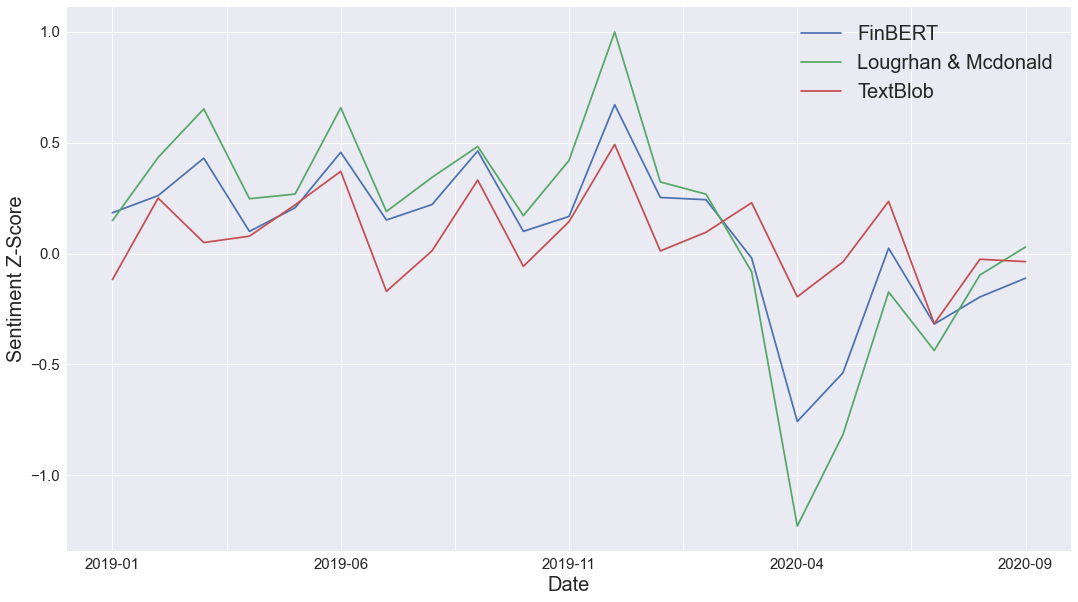

In [8]:
call_sent_by_month = call_data_long.loc[call_data_long['variable'].isin(['FinBERT','Lougrhan & Mcdonald','TextBlob']),:]\
    .groupby(['yyyymm', 'variable'])['value'].mean().unstack().plot(kind='line',fontsize=15,rot=0)

plt.xlabel('Date', fontsize=20)
plt.ylabel('Sentiment Z-Score', fontsize=20)
plt.legend(prop={'size':20})

### Call Duration and Word-Counts Over Time

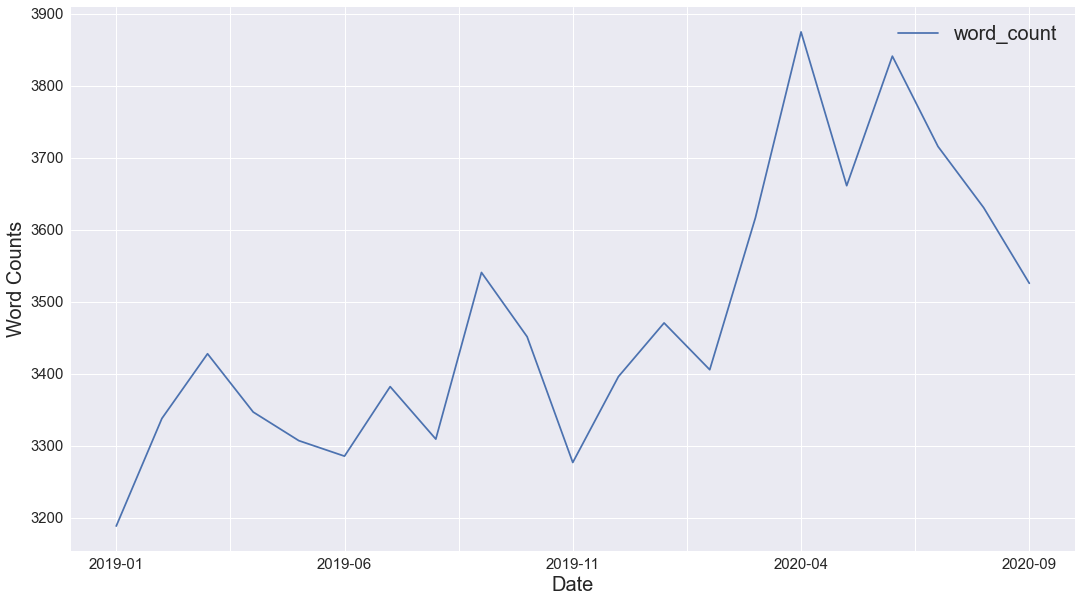

In [17]:
call_data_r_long = call_data[['cid', 'ticker', 'call_date', 'sector_x', 'yyyymm','duration_minutes','style']]\
                           .merge(call_sent_long,how='inner',on='cid').rename(columns={'sector_x':'sector'})
word_count_by_month = call_data_r_long.loc[call_data_r_long['variable'].isin(['word_count']),:]\
    .groupby(['yyyymm', 'variable'])['value'].mean().unstack().plot(kind='line',fontsize=15,rot=0)

plt.xlabel('Date', fontsize=20)
plt.ylabel('Word Counts', fontsize=20)
plt.legend(prop={'size':20})

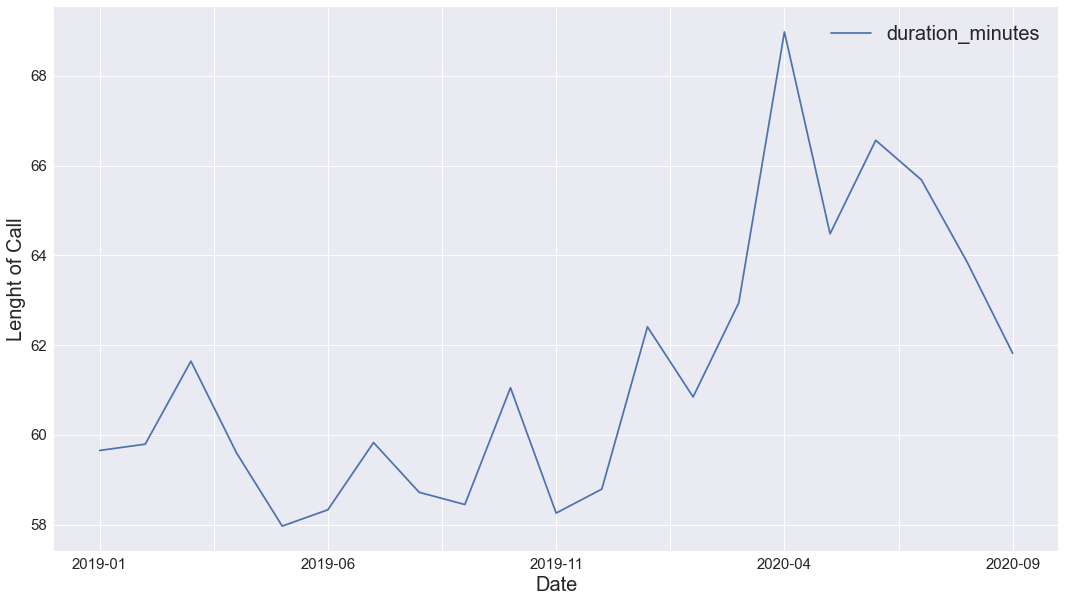

In [10]:
call_duration_by_month = call_data[['cid', 'ticker', 'call_date', 'sector_x', 'yyyymm','duration_minutes']] \
    .groupby(['yyyymm'])['duration_minutes'].mean().plot(kind='line',fontsize=15,rot=0)

plt.xlabel('Date', fontsize=20)
plt.ylabel('Lenght of Call', fontsize=20)
plt.legend(prop={'size':20})

## Sector Exposures

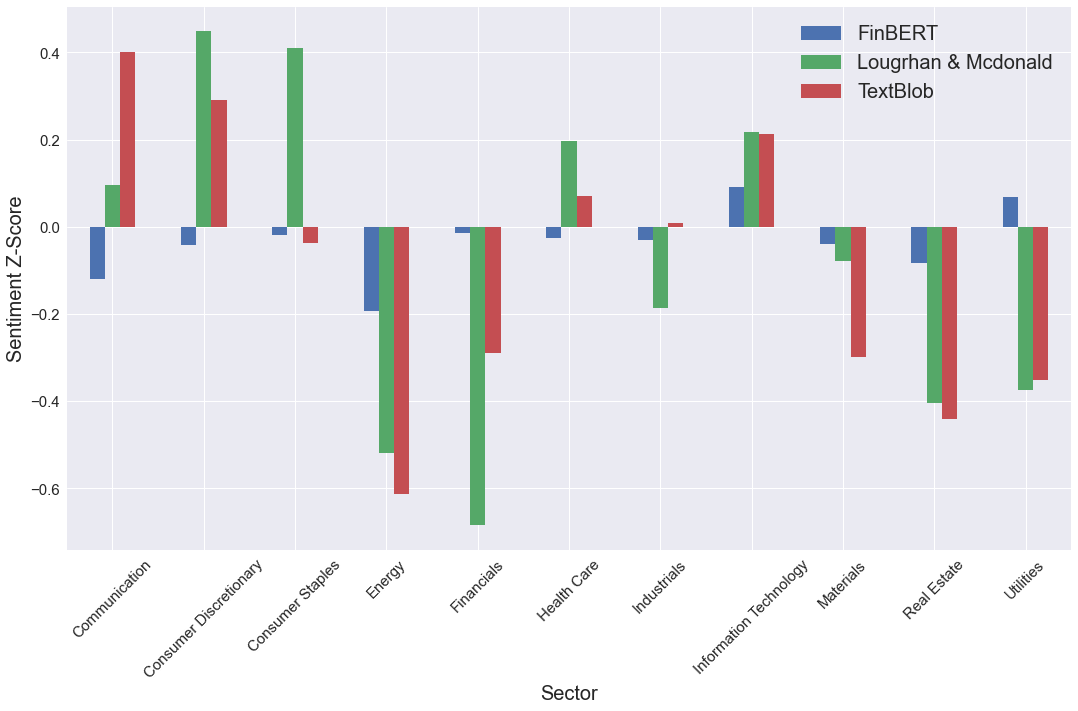

In [11]:
call_sent_by_sector = call_data_long.loc[call_data_long['variable'].isin(['FinBERT','Lougrhan & Mcdonald','TextBlob']),:]\
    .groupby(['sector', 'variable'])['value'].mean().unstack().plot(kind='bar',fontsize=15,rot=45)

plt.xlabel('Sector', fontsize=20)
plt.ylabel('Sentiment Z-Score', fontsize=20)
plt.legend(prop={'size':20})

## Style Exposures

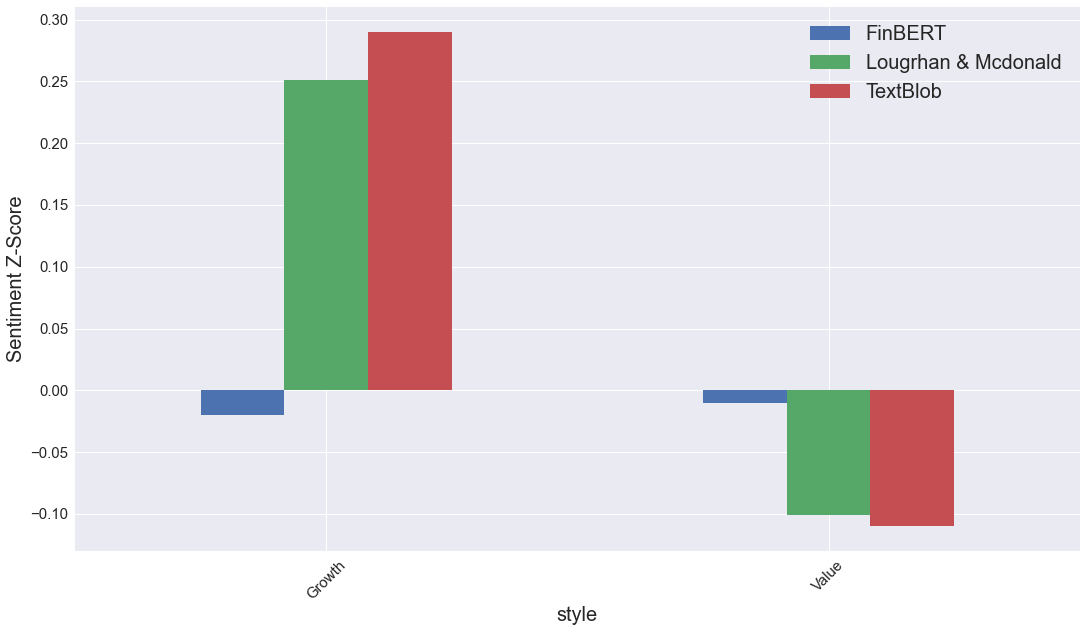

In [12]:
call_sent_by_sector = call_data_long.loc[call_data_long['variable'].isin(['FinBERT','Lougrhan & Mcdonald','TextBlob']),:]\
    .groupby(['style', 'variable'])['value'].mean().unstack().plot(kind='bar',fontsize=15,rot=45)

plt.xlabel('style', fontsize=20)
plt.ylabel('Sentiment Z-Score', fontsize=20)
plt.legend(prop={'size':20})

## Returns Analysis
For each conferen call, collect the returns of the company leading up to the call, and track the returns following the call

`[t-6 months, t-3 months, t-1 month]`... **call date at time t** ... `[t+1 months, t+3 months, t+6 month]`

After all the (prior and forward) returns for all the calls are collected, evaluate the spread between the top rated calls and the bottom rated calls.

Note: This is not really an implemental strategy at this point; just intended for a quick analysis

### Top Sentiment vs Bottom Sentiment: Quintile Spreads

In [13]:
ret_windows = [21, 62, 127]
ret_col_pri = [f't-{rw} trading days' for rw in reversed(ret_windows)]
ret_col_fwd = [f't+{rw} trading days' for rw in ret_windows]
ret_cols = ret_col_pri + ret_col_fwd

ntiles = 5
call_data['Lougrhan & Mcdonald Q-Sprd'] = pd.qcut(call_data['Lougrhan & Mcdonald'], ntiles, labels=False)
call_data['TextBlob Q-Sprd'] = pd.qcut(call_data['TextBlob'], ntiles, labels=False)
call_data['FinBERT Q-Sprd'] = pd.qcut(call_data['FinBERT'], ntiles, labels=False)


In [14]:
output = call_data.loc[call_data['call_date'] <= '2020-10-01',
                     ['cid', 'Lougrhan & Mcdonald Q-Sprd', 'TextBlob Q-Sprd', 'FinBERT Q-Sprd'] + ret_cols] \
    .melt(id_vars=['cid'] + ret_cols,var_name='measure',value_name='qtile')

output = (output.loc[output['qtile'].isin([0,4]),:]
          .groupby(['measure','qtile'])[ret_cols]
          .mean()*100).reset_index()\
            .melt(id_vars=['measure','qtile'])\
            .pivot(index=['measure','variable'],columns='qtile',values='value').reset_index()

output['quintile spread'] = output[4] - output[0]

### Trailing Returns of Sentiment Score Quintiles 
Forward Return of Top 20% of Calls minus Return of Bottom 20% of calls

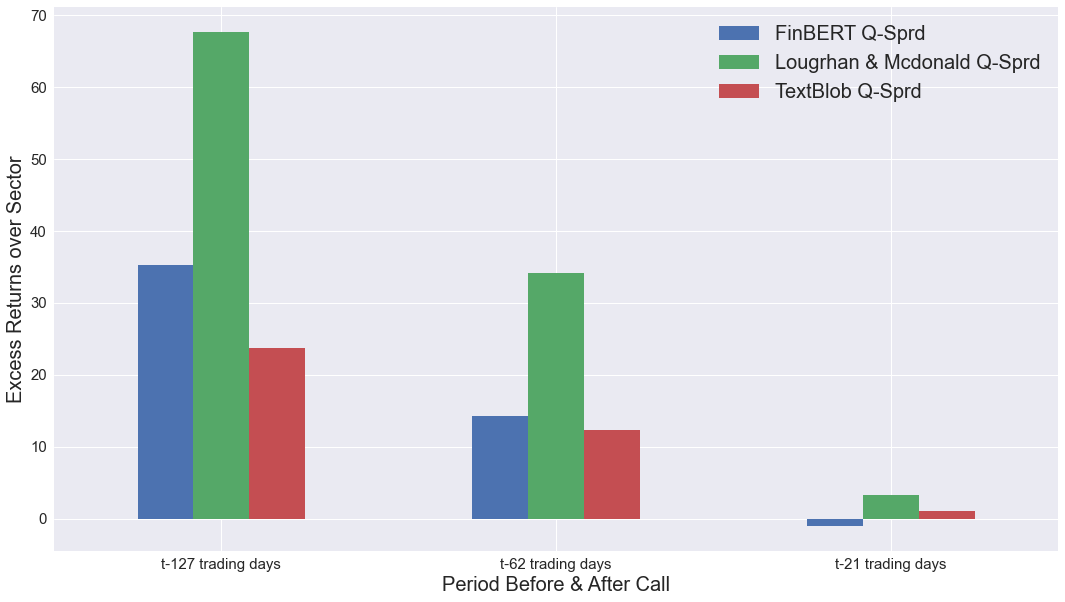

In [15]:
output_pri = output.pivot(index='variable',columns='measure',values='quintile spread').loc[ret_col_pri,:]
output_pri.plot(kind='bar',fontsize=15,rot=0)
plt.xlabel('Period Before & After Call', fontsize=20)
plt.ylabel('Excess Returns over Sector', fontsize=20)
plt.legend(prop={'size':20})

### Forward Returns of Sentiment Score Quintiles 
Forward Return of Top 20% of Calls minus Return of Bottom 20% of calls

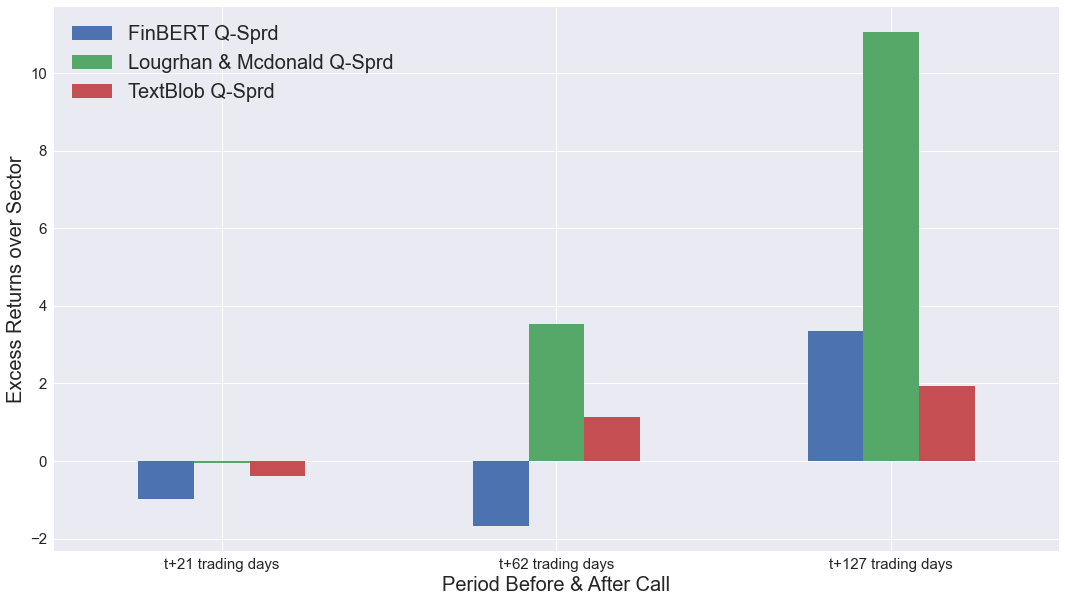

In [16]:
output_fwd = output.pivot(index='variable',columns='measure',values='quintile spread').loc[ret_col_fwd,:]
output_fwd.plot(kind='bar',fontsize=15,rot=0)
plt.xlabel('Period Before & After Call', fontsize=20)
plt.ylabel('Excess Returns over Sector', fontsize=20)
plt.legend(prop={'size':20})